$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 5: Neural Networks

*Namita Kharat*

## Overview

* I have written and applied code that trains neural networks of various numbers of hidden layers and units in each hidden layer and returns results as specified below.  This code is applied once for a regression problem and once for a classification problem. 

## Required Code

Following modules were used:

* `neuralnetworks.py`
* `scaledconjugategradient.py`
* `mlutils.py`

Following algorithm was used to write the function:
 `results = trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify)`
 
   * For each network structure given in `hiddenLayerStructures`
    * For numberRepetitions
      * Use `ml.partition` to randomly partition X and T into training and testing sets.
      * Create a neural network of the given structure
      * Train it for numberIterations
      * Use the trained network to produce outputs for the training and for the testing sets
      * If classifying, calculate the fraction of samples incorrectly classified for training and testing sets.
       Otherwise, calculate the RMSE of training and testing sets.
      * Add the training and testing performance to a collection (such as a list) for this network structure
    * Add to a collection of all results the hidden layer structure, lists of training performance and testing performance, and seconds taken to do these repetitions.
  * return the collection of all results

This function returns `results` which is list with one element for each network structure tested.  Each element is a list containing 

* the hidden layer structure (as a list),
* a list of training data performance for each repetition, 
* a list of testing data performance for each repetition, and
* the number of seconds it took to run this many repetitions for this network structure.


Additionally, following two functions were written:

* `summary = summarize(results)` where `results` is returned by `trainNNs` and `summary` is like `results` with the training and testing performance lists replaced by their means
* `best = bestNetwork(summary)` where `summary` is returned by `summarize` and `best` is the best element of `summary`

In [1]:
from mlutils import *
from neuralnetworks import *
from scaledconjugategradient import *
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify):
    results=[]
    fractions=[trainFraction,1-trainFraction]
    for ntwkstruct in hiddenLayerStructures:
        training_performance=[]
        testing_performance=[]
        start_time=time.time()
        for nrep in range(numberRepetitions):                    # Loop for number of repetitions to train the network
            if len(fractions) == 2:
                Xtrain,Ttrain,Xtest,Ttest=partition(X,T,fractions)
            else:
                Xtrain,Ttrain,Xvalidate,Tvalidate,Xtest,Ttest=partition(X,T,fractions)
            if classify is True:                                 # For classification, use NeuralNetworkClassifier Class
                Tclass=np.unique(T)
                nn_object=NeuralNetworkClassifier(X.shape[1], ntwkstruct, len(Tclass))
            else:                                                # For regression, use NeuralNetwork Class
                nn_object=NeuralNetwork(X.shape[1], ntwkstruct, T.shape[1])
            nn_object.train(Xtrain, Ttrain, numberIterations)
            Y = nn_object.use(Xtrain)
            Ytest= nn_object.use(Xtest)
            if classify is True:                                  # Samples misclassified for classification
                trainPerf=np.sum(Y!=Ttrain)/len(Ttrain)
                testPerf=np.sum(Ytest!=Ttest)/len(Ttest)
            else:                                                 # Calculate RMSE for regression
                trainPerf=np.sqrt(np.mean((Y-Ttrain)**2))
                testPerf=np.sqrt(np.mean((Ytest-Ttest)**2))
            training_performance.append(trainPerf)
            testing_performance.append(testPerf)
        global error_trace
        error_trace=nn_object.getErrorTrace()
        end_time=time.time()
        secondsTaken=end_time-start_time                           # Calculate time taken
        results.append([ntwkstruct,training_performance,testing_performance,secondsTaken])
    return results
    
def summarize(results):
    result=[]
    for i in range(len(results)):
        hs=results[i][0]
        # Calculate mean for training and testing performance
        train_perf=np.mean(results[i][1])
        test_perf=np.mean(results[i][2])
        time=results[i][3]
        result.append([hs,train_perf,test_perf,time])
    return result

def bestNetwork(summary):
    min_test=[]
    for i in range(len(summary)):
        min_test.append(summary[i][2])
    best_parameter = min_test.index(min(min_test))   # get the minimum testing performance
    return summary[best_parameter]
    

## Examples


In [80]:
X = np.arange(10).reshape((-1,1))
T = X + 1 + np.random.uniform(-1, 1, ((10,1)))

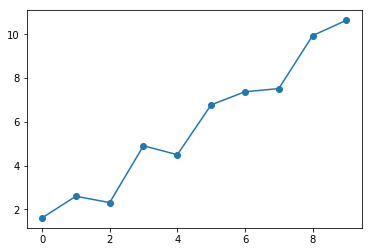

In [81]:
plt.plot(X, T, 'o-');

[0.71 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.43 0.28 0.27 0.17
 0.16 0.16 0.16 0.16 0.15 0.14 0.14 0.14 0.14 0.14 0.14 0.13 0.13 0.13
 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13
 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13
 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13
 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13
 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13
 0.13 0.13 0.13]


Text(0,0.5,'Error')

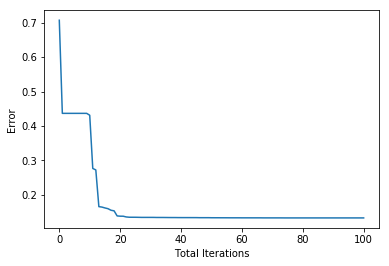

In [82]:
nnet = NeuralNetwork(X.shape[1], 2, T.shape[1])
nnet.train(X, T, 100)
error=nnet.getErrorTrace()
print(error)
plt.plot(error)
plt.xlabel('Total Iterations')
plt.ylabel('Error')

[0.71 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.27 0.2  0.17 0.17
 0.15 0.15 0.14 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13
 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13
 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13
 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13
 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13
 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13
 0.13 0.13 0.13]


Text(0,0.5,'Error')

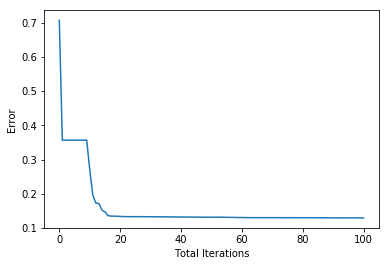

In [83]:
nnet = NeuralNetwork(X.shape[1], [5, 5, 5], T.shape[1])
nnet.train(X, T, 100)
error=nnet.getErrorTrace()
print(error)
plt.plot(error)
plt.xlabel('Total Iterations')
plt.ylabel('Error')

In [84]:
results = trainNNs(X, T, 0.8, [2, 10, [10, 10]], 5, 100, classify=False)
results

[[2,
  [0.5711735394769478,
   0.3941129930970702,
   0.5091270456411918,
   0.5361918810990133,
   0.49942829132699545],
  [0.6495369077571752,
   1.213872900201404,
   0.9027250907674682,
   0.7426651889412671,
   0.7405603353896957],
  0.14482784271240234],
 [10,
  [0.43128103237421234,
   0.20977180876417173,
   0.15417325026053397,
   0.5160502162991122,
   0.5353679469887929],
  [1.1647819783467865,
   2.11679295776135,
   1.9363630104477865,
   1.0301191775418697,
   0.7706692490402415],
  0.19251132011413574],
 [[10, 10],
  [0.29658884701624727,
   0.33513024400406927,
   0.5287477445792547,
   0.2816849623207342,
   0.2791853893207885],
  [1.810173874749765,
   2.267960124687041,
   0.596481940856719,
   2.5495340908270263,
   2.4820795883544653],
  0.24996542930603027]]

[0.71 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.23 0.17
 0.17 0.17 0.16 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.14 0.14 0.14
 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14
 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.13 0.13
 0.13 0.12 0.12 0.12 0.11 0.11 0.11 0.1  0.1  0.1  0.09 0.09 0.09 0.08
 0.08 0.08 0.08 0.08 0.08 0.08 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
 0.07 0.07 0.07]


Text(0,0.5,'Error')

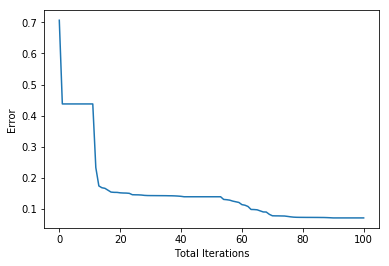

In [85]:
print(error_trace)
plt.plot(error_trace)
plt.xlabel('Total Iterations')
plt.ylabel('Error')

In [86]:
results = trainNNs(X, T, 0.8, [0, 1, 2, 10, [10, 10], [5, 5, 5, 5], [2]*5], 50, 100, classify=False)

In [87]:
summarize(results)

[[0, 0.5726963059904966, 0.7169679898300856, 0.03402519226074219],
 [1, 0.5172137526874802, 0.8384493421000667, 1.6025161743164062],
 [2, 0.49345451713513017, 1.108947777171244, 1.7343909740447998],
 [10, 0.38538791599537703, 1.5405734454860425, 1.9185335636138916],
 [[10, 10], 0.40706761734716634, 1.321406068559477, 2.6981029510498047],
 [[5, 5, 5, 5], 0.45415812585453, 1.2906159594311302, 3.6335713863372803],
 [[2, 2, 2, 2, 2], 0.5178285874138384, 0.8037498227955777, 3.7231647968292236]]

In [88]:
best = bestNetwork(summarize(results))
print(best)
print('Hidden Layers {} Average RMSE Training {:.2f} Testing {:.2f} Took {:.2f} seconds'.format(*best))

[0, 0.5726963059904966, 0.7169679898300856, 0.03402519226074219]
Hidden Layers 0 Average RMSE Training 0.57 Testing 0.72 Took 0.03 seconds


[0.71 0.7  0.7  0.7  0.7  0.68 0.58 0.5  0.4  0.27 0.25 0.25 0.24 0.24
 0.23 0.22 0.22 0.19 0.18 0.18 0.17 0.17 0.15 0.15 0.15 0.15 0.15 0.15
 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.14 0.14 0.14 0.14 0.14 0.14
 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14
 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.13 0.13 0.13 0.13
 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13
 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.12 0.12 0.12 0.12 0.12 0.12 0.12
 0.12 0.12 0.12]


Text(0,0.5,'Error')

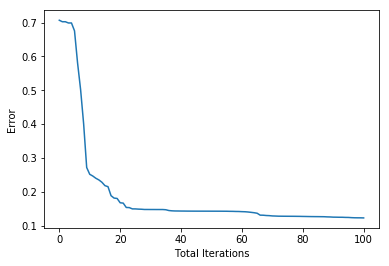

In [89]:
print(error_trace)
plt.plot(error_trace)
plt.xlabel('Total Iterations')
plt.ylabel('Error')

Hummm...neural nets with no hidden layers did best on this simple data set.  Why?  Remember what "best" means.

**The neural nets with no hidden layers did best(has minimum mean test error) on this simple data set possibly because adding hidden layers adds complexity which might lead to overfitting of data and thus, increasing the test error.**

## Data for Regression Experiment

From the UCI Machine Learning Repository, download the [Appliances energy prediction](http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) data.  You can do this by visiting the Data Folder for this data set, or just do this:

     !wget http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv



Read this data into python.  One suggestion is to use the `loadtxt` function in the `numpy` package.  You may ignore the first column of each row which contains a data and time.  Also ignore the last two columns of random variables.  We will not use that in our modeling of this data.  You will also have to deal with the double quotes that surround every value in every field.  Read the first line of this file to get the names of the features.

Once you have read this in correctly, you should see values like this:

In [14]:
read_data = np.loadtxt("energydata_complete.csv",delimiter=',',dtype='str',usecols=[i for i in range(29) if i not in [0,27,28]])
dataHeader=np.char.strip(read_data,'",')
header=dataHeader[0,:]
names=header.tolist()
data=dataHeader[1:,:]
data=data.astype(np.float)
Xenergy=data[:,2:]
Xnames=[names[i] for i in range(len(names)) if i not in [0,1]]
Tenergy=data[:,:2]
Tnames=[names[i] for i in range(len(names)) if i in [0,1]]

In [15]:
names

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [16]:
data.shape

(19735, 26)

In [17]:
data[:2,:]

array([[ 60.        ,  30.        ,  19.89      ,  47.59666667,
         19.2       ,  44.79      ,  19.79      ,  44.73      ,
         19.        ,  45.56666667,  17.16666667,  55.2       ,
          7.02666667,  84.25666667,  17.2       ,  41.62666667,
         18.2       ,  48.9       ,  17.03333333,  45.53      ,
          6.6       , 733.5       ,  92.        ,   7.        ,
         63.        ,   5.3       ],
       [ 60.        ,  30.        ,  19.89      ,  46.69333333,
         19.2       ,  44.7225    ,  19.79      ,  44.79      ,
         19.        ,  45.9925    ,  17.16666667,  55.2       ,
          6.83333333,  84.06333333,  17.2       ,  41.56      ,
         18.2       ,  48.86333333,  17.06666667,  45.56      ,
          6.48333333, 733.6       ,  92.        ,   6.66666667,
         59.16666667,   5.2       ]])

Use the first two columns, labelled `Appliances` and `lights` as the target variables, and the remaining 24 columns as the input features.  So

In [18]:
Xenergy.shape, Tenergy.shape

((19735, 24), (19735, 2))

In [19]:
Xnames

['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [20]:
Tnames

['Appliances', 'lights']

Train several neural networks on all of this data for 100 iterations.  Plot the error trace (nnet.getErrorTrace()) to help you decide now many iterations might be needed.  100 may not be enough.  If for your larger networks the error is still decreasing after 100 iterations you should train all nets for more than 100 iterations.

Now use your `trainNNs`, `summarize`, and `bestNetwork` functions on this data to investigate various network sizes.

In [21]:
results = trainNNs(Xenergy, Tenergy, 0.8, [0, 5, [5, 5], [10, 10]], 10, 100, classify=False)

In [22]:
summarize(results)

[[0, 67.25952482847894, 66.76231090035174, 1.5169389247894287],
 [5, 65.6261939004393, 65.47471028225542, 22.47589087486267],
 [[5, 5], 64.99062374303205, 65.9651027307784, 26.149014949798584],
 [[10, 10], 62.80751971807838, 65.07234328787823, 45.30877494812012]]

In [23]:
bestNetwork(summarize(results))

[[10, 10], 62.80751971807838, 65.07234328787823, 45.30877494812012]

[0.70710678 0.70200169 0.70200169 0.70200169 0.70200169 0.70200169
 0.70200169 0.70200169 0.70200169 0.70200169 0.69873289 0.69759869
 0.69446746 0.67924819 0.67360928 0.66915978 0.66713549 0.66550823
 0.66056017 0.6559082  0.65436887 0.65211131 0.65070189 0.64866694
 0.64509164 0.6422796  0.64092133 0.63957014 0.63769934 0.63685653
 0.63575044 0.63514684 0.63470226 0.63400353 0.63328397 0.63279693
 0.63188437 0.63123664 0.63050629 0.62896861 0.62821745 0.62717711
 0.62649626 0.62576099 0.62408534 0.62323171 0.62180854 0.62108602
 0.6198614  0.61914205 0.61840661 0.61769759 0.61706119 0.61582066
 0.61517251 0.61457587 0.61359767 0.61268885 0.61160495 0.6108934
 0.60968857 0.60894625 0.60813853 0.60731541 0.60658512 0.60539071
 0.60474211 0.60398001 0.60302932 0.60250687 0.60199027 0.60115119
 0.60049527 0.59969145 0.59926891 0.59862913 0.59819566 0.59783731
 0.59735768 0.59687768 0.59643528 0.59609147 0.59550717 0.59511483
 0.59476284 0.59405783 0.59335749 0.59297397 0.59216896 0.59168

Text(0,0.5,'Error')

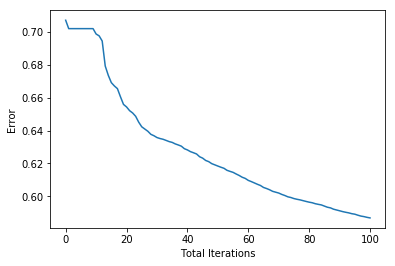

In [24]:
print(error_trace)
plt.plot(error_trace)
plt.xlabel('Total Iterations')
plt.ylabel('Error')

**From the plot above, we can observe that error is decreasing even after 100 iterations, thus, we need to increase the number of iterations parameter to 500.**

In [25]:
results = trainNNs(Xenergy, Tenergy, 0.8, [0, 5, [5, 5], [10, 10]], 10, 500, classify=False)

In [26]:
summarize(results)

[[0, 67.23126128673549, 66.91049724659926, 2.0844240188598633],
 [5, 64.52505253878603, 66.3234126737973, 108.55655550956726],
 [[5, 5], 63.8722511327169, 64.74687946187126, 134.52308464050293],
 [[10, 10], 59.14379228305728, 63.70912803100431, 233.8383641242981]]

In [27]:
bestNetwork(summarize(results))

[[10, 10], 59.14379228305728, 63.70912803100431, 233.8383641242981]

[0.70710678 0.70293599 0.70293599 0.70293599 0.70293599 0.70293599
 0.70293599 0.70293599 0.70293599 0.70293599 0.69556816 0.69556816
 0.68974332 0.68974332 0.6823987  0.67520107 0.66986326 0.66519957
 0.66137871 0.65912785 0.65686401 0.65392138 0.65222217 0.6487501
 0.64606416 0.64298149 0.64156221 0.64074155 0.63966978 0.63786065
 0.63674034 0.63566281 0.63430374 0.63340606 0.63284209 0.63206138
 0.6312305  0.63057525 0.62910345 0.62870622 0.62836439 0.62797512
 0.62692318 0.62642356 0.62530069 0.6243318  0.62353563 0.62287024
 0.62234713 0.62190773 0.62129735 0.62032717 0.6198923  0.61938027
 0.61817316 0.61780645 0.61727995 0.61642544 0.61605288 0.61505342
 0.61456405 0.61383467 0.61311672 0.61274779 0.61190151 0.61132332
 0.61059033 0.60972017 0.60938214 0.60855528 0.60805056 0.60733797
 0.60650124 0.60593777 0.60514176 0.60474144 0.60411695 0.60385946
 0.60329579 0.60270558 0.60219782 0.60168094 0.60110175 0.60063754
 0.60003152 0.59948078 0.59905503 0.59822803 0.59780329 0.59727

Text(0,0.5,'Error')

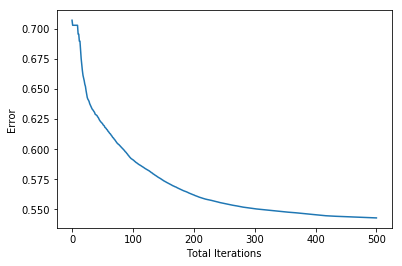

In [28]:
print(error_trace)
plt.plot(error_trace)
plt.xlabel('Total Iterations')
plt.ylabel('Error')

**Thus, increasing the number of iterations to 500, brings error stability.**

Test at least 10 different hidden layer structures.  Larger numbers of layers and units may do the best on training data, but not on testing data. Why?

Now train another network with your best hidden layer structure on 0.8 of the data and use the trained network on the testing data (the remaining 0.2 of the date).  As before use `ml.partition` to produce the training and testing sets.

For the testing data, plot the predicted and actual `Appliances` energy use, and the predicted and actual `lights` energy use, in two separate plots.  Discuss what you see.

**Larger numbers of layers and units do the best on training data, but not on testing data because as the number of layers and units increases, there will be high chances for overfitting of data. The network memorizes the training examples so well that it has not learned to generalize to new samples. Thus, we might get a model which performs best on training dataset but not on samples which were not part of the training set (testing data).**

In [29]:
results = trainNNs(Xenergy, Tenergy, 0.8, [0, 3, [4, 8], 2, 5, [5, 5], [2, 2, 2], 4, [1, 2], [10, 10, 15, 5]], 10, 600, classify=False)
summarize(results)

[[0, 67.27920832218096, 66.72419247626631, 1.5099563598632812],
 [3, 65.51208216896137, 65.83350373778221, 119.44342947006226],
 [[4, 8], 63.55339292669187, 65.86749152675668, 160.77783870697021],
 [2, 66.08677855101826, 67.36304231465921, 112.5199544429779],
 [5, 64.76531884672497, 65.0910630753537, 129.81966710090637],
 [[5, 5], 63.331603783035106, 65.79357729200845, 1043.915411233902],
 [[2, 2, 2], 66.08101293753421, 67.02224540211074, 132.60122537612915],
 [4, 64.76079290439374, 65.9818407984936, 117.77788400650024],
 [[1, 2], 70.29954276626806, 70.2152610608403, 129.90643572807312],
 [[10, 10, 15, 5], 54.48752727724086, 64.0213995991909, 517.656099319458]]

In [30]:
best_network=bestNetwork(summarize(results))
best_network

[[10, 10, 15, 5], 54.48752727724086, 64.0213995991909, 517.656099319458]

Text(0,0.5,'Error')

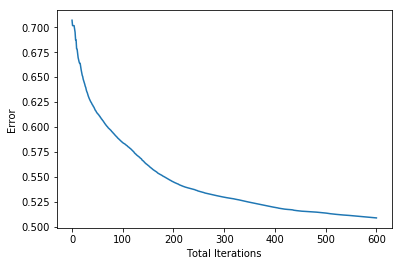

In [31]:
plt.plot(error_trace)
plt.xlabel('Total Iterations')
plt.ylabel('Error')

**Now, train the network with the best hidden layer structure i.e. [10, 10, 15, 5] in our case**

In [32]:
plt.figure(figsize=(8,8))
xTrain,tTrain,xTest,tTest = partition(Xenergy, Tenergy, fractions=[0.8,0.2], classification=False)
print(xTrain.shape,tTrain.shape,xTest.shape,tTest.shape)
nnR = NeuralNetwork(Xenergy.shape[1], best_network[0], Tenergy.shape[1])
nnR.train(xTrain,tTrain,1500)
predictTest = nnR.use(xTest)

(15788, 24) (15788, 2) (3947, 24) (3947, 2)


<Figure size 576x576 with 0 Axes>

Text(0,0.5,'Predicted energy use for Appliances')

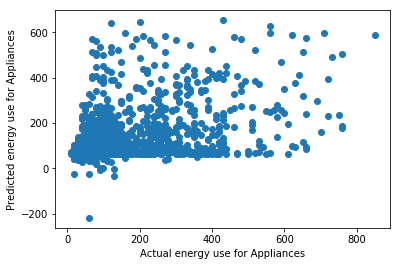

In [33]:
plt.plot(tTest[:,0],predictTest[:,0], 'o')
plt.xlabel('Actual energy use for Appliances')
plt.ylabel('Predicted energy use for Appliances')

## Observation:

The above plot is a plot of actual values and predicted values for Appliances energy use. Ideally, if the target values and predicted values match perfectly, the plot would have points aligned at 45 degree. But in our case, the points are scattered indicating the predicted values are not exact match of target.

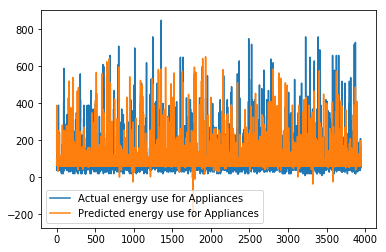

In [34]:
plt.plot(tTest[:,0],label='Actual energy use for Appliances')
plt.plot(predictTest[:,0],label='Predicted energy use for Appliances')
plt.legend()

## Observation:

The above plot shows the predicted values over target values. The predicted values do not match target values always as the network has overall mean test error of 64%.

Text(0,0.5,'Predicted energy use for Lights')

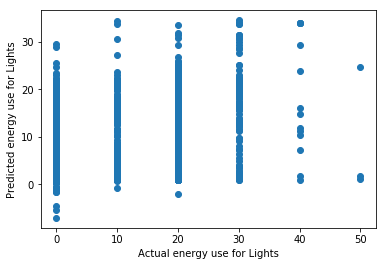

In [35]:
plt.plot(tTest[:,1],predictTest[:,1], 'o')
plt.xlabel('Actual energy use for Lights')
plt.ylabel('Predicted energy use for Lights')

## Observation:

From the plot above, it can be concluded that the prediced and actual values are not same at all points. For a perfect network, the graph would have points aligned at 45 degrees.

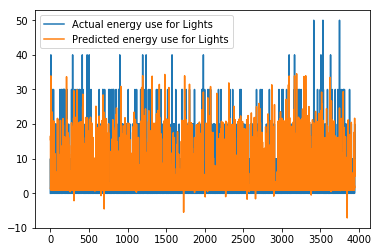

In [36]:
plt.plot(tTest[:,1],label='Actual energy use for Lights')
plt.plot(predictTest[:,1],label='Predicted energy use for Lights')
plt.legend()

## Observation:

The trained network has predicted values different than the target values on some points.

## Data for Classification Experiment

From the UCI Machine Learning Repository, download the [Anuran Calls (MFCCs)](http://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29) data.  You can do this by visiting the Data Folder for this data set, or just do this:

     !wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/00406/Anuran Calls (MFCCs).zip'
     !unzip Anuran*zip
     
Read the data in the file `Frogs_MFCCs.csv` into python.  This will be a little tricky. Each line of the file is a sample of audio features plus three columns that label the sample by family, genus, and species. We will try to predict the species.  The tricky part is that the species is given as text.  We need to convert this to a target class, as an integer. The `numpy` function `unique` will come in handy here.

In [37]:
dataRead = np.loadtxt("Frogs_MFCCs.csv",delimiter=',',dtype='str')
data=dataRead[1:,:]
dataFloat=dataRead[1:,1:22].astype(np.float)
species=data[:,24]
speciesClass=np.unique(species)
speciesList=speciesClass.tolist()
list1, list2 = speciesList, [0,1,2,3,4,5,6,7,8,9]
classes=dict( zip( list1, list2)) 

# Convert the target ie Species to integer values
speciesData=[]
for i in range(len(species)):
    speciesData.append(classes.get(species[i]))
modifiedSpecies=np.asarray(speciesData)
modifiedSpecies=np.reshape(modifiedSpecies,(len(speciesData),1))

dataString=dataRead[1:,22:23]
dataRecord=dataRead[1:,25].astype(np.float)
Xanuran=dataFloat
Tanuran=modifiedSpecies

In [38]:
Xanuran.shape, Tanuran.shape

((7195, 21), (7195, 1))

In [39]:
Xanuran[:2,:]

array([[ 0.1529363 , -0.1055859 ,  0.20072191,  0.31720106,  0.26076385,
         0.10094464, -0.1500626 , -0.17112763,  0.12467644,  0.18865415,
        -0.07562172, -0.15643593,  0.08224512,  0.13575204, -0.02401665,
        -0.10835111, -0.07762252, -0.0095678 ,  0.05768398,  0.11868014,
         0.01403845],
       [ 0.17153426, -0.09897474,  0.26842522,  0.33867186,  0.2683531 ,
         0.06083509, -0.22247464, -0.20769267,  0.17088287,  0.27095828,
        -0.09500394, -0.25434147,  0.02278623,  0.1633201 ,  0.01202228,
        -0.09097401, -0.05650952, -0.03530336,  0.02013996,  0.08226299,
         0.02905574]])

In [40]:
Tanuran[:2]

array([[0],
       [0]])

In [41]:
for i in range(10):
    print('{} samples in class {}'.format(np.sum(Tanuran==i), i))

672 samples in class 0
3478 samples in class 1
542 samples in class 2
310 samples in class 3
472 samples in class 4
1121 samples in class 5
270 samples in class 6
114 samples in class 7
68 samples in class 8
148 samples in class 9


In [42]:
results = trainNNs(Xanuran, Tanuran, 0.8, [0, 5, [5, 5]], 5, 100, classify=True)

In [43]:
summarize(results)

[[0, 0.028179291174426684, 0.03280055594162613, 1.308464765548706],
 [5, 0.03780403057678944, 0.049617790132036134, 4.245641708374023],
 [[5, 5], 0.05020847810979847, 0.0561501042390549, 4.625623464584351]]

In [44]:
bestNetwork(summarize(results))

[0, 0.028179291174426684, 0.03280055594162613, 1.308464765548706]

Text(0,0.5,'Error')

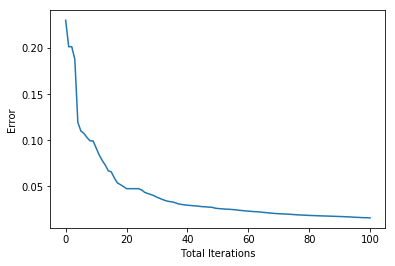

In [45]:
plt.plot(error_trace)
plt.xlabel('Total Iterations')
plt.ylabel('Error')

Now do an investigation like you did for the regression data. 

Test at least 10 different hidden layer structures. Then train another network with your best hidden layer structure on 0.8 of the data and use the trained network on the testing data (the remaining 0.2 of the date). 

Plot the predicted and actual `Species` for the testing data as an integer.  Discuss what you see.

In [46]:
results = trainNNs(Xanuran, Tanuran, 0.8, [0, 5, [5, 5], 2, [4, 3, 7], [3, 10, 12], 6, [9, 4], [10, 10, 10, 5], [2]*5], 10, 200, classify=True)

In [47]:
summarize(results)

[[0, 0.02696316886726894, 0.03481584433634468, 5.584058523178101],
 [5, 0.03314801945795691, 0.04364141765114663, 19.51179599761963],
 [[5, 5], 0.030715774843641415, 0.045795691452397494, 4909.576181173325],
 [2, 0.13069840166782484, 0.13259207783182766, 28.806341886520386],
 [[4, 3, 7], 0.06864141765114663, 0.07859624739402363, 19.180910110473633],
 [[3, 10, 12], 0.051911049339819326, 0.06323835997220292, 26.6629056930542],
 [6, 0.020396108408617095, 0.03439888811674774, 24.656365394592285],
 [[9, 4], 0.018710910354412785, 0.04107018763029882, 32.99570345878601],
 [[10, 10, 10, 5],
  0.02211605281445448,
  0.041487143849895755,
  44.133835792541504],
 [[2, 2, 2, 2, 2], 0.285406532314107, 0.29457956914523975, 26.636954307556152]]

In [48]:
best_network=bestNetwork(summarize(results))
best_network

[6, 0.020396108408617095, 0.03439888811674774, 24.656365394592285]

**Now, train the network with the best structure.**

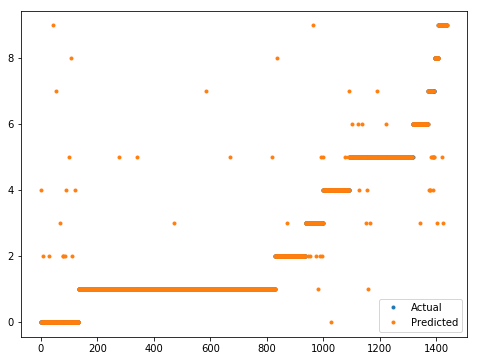

In [49]:
xTrain,tTrain,xTest,tTest = partition(Xanuran, Tanuran, fractions=[0.8,0.2], classification=True)
nnC = NeuralNetworkClassifier(Xanuran.shape[1], best_network[0], len(np.unique(Tanuran)))
nnC.train(xTrain,tTrain,1500)
Ptrain,Prtrain,_ = nnC.use(xTrain,allOutputs=True)
Ptest,Prtest,_ = nnC.use(xTest,allOutputs=True)
# plt.subplot(2,1,1)
# plt.plot(np.hstack((tTrain,Ptrain)), '.')
# plt.legend(('Actual','Predicted'))
# plt.subplot(2,1,2)
plt.figure(figsize=(8,6))
plt.plot(np.hstack((tTest,Ptest)), '.')
plt.legend(('Actual','Predicted'));

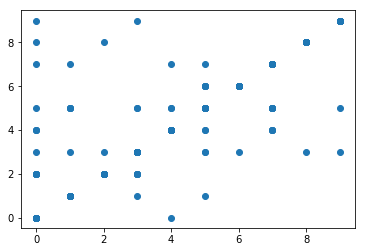

In [50]:
plt.scatter(tTest,Ptest)

## Observation

In the plot above, there are some points where the actual and predicted values do not match.

Text(0,0.5,'Error')

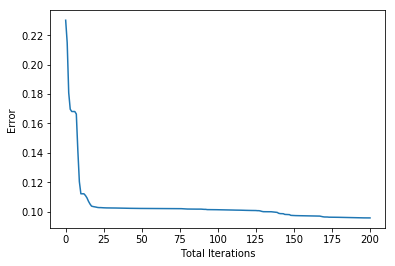

In [51]:
plt.plot(error_trace)
plt.xlabel('Total Iterations')
plt.ylabel('Error')

## Observation

The error decreases drastically within 25 iterations and becomes stable to a minimum over 200 iterations

In [52]:
cm = ml.confusionMatrix(tTest,Ptest,np.unique(tTest))
print(classes)

       0    1    2    3    4    5    6    7    8    9
    ------------------------------------------------------------
 0 | 89.6  0    4.5  0.7  2.2  0.7  0    0.7  0.7  0.7   (134 / 134)
 1 |  0   99.1  0    0.1  0    0.6  0    0.1  0    0     (696 / 696)
 2 |  0    0   98.1  0.9  0    0    0    0    0.9  0     (108 / 108)
 3 |  0    1.6  8.1 85.5  0    3.2  0    0    0    1.6   (62 / 62)
 4 |  1.1  0    0    0   95.7  2.1  0    1.1  0    0     (94 / 94)
 5 |  0    0.4  0    0.9  0.9 95.1  2.2  0.4  0    0     (224 / 224)
 6 |  0    0    0    1.9  0    0   98.1  0    0    0     (54 / 54)
 7 |  0    0    0    0   17.4 26.1  0   56.5  0    0     (23 / 23)
 8 |  0    0    0    7.1  0    0    0    0   92.9  0     (14 / 14)
 9 |  0    0    0    3.3  0    3.3  0    0    0   93.3   (30 / 30)
{'AdenomeraAndre': 0, 'AdenomeraHylaedactylus': 1, 'Ameeregatrivittata': 2, 'HylaMinuta': 3, 'HypsiboasCinerascens': 4, 'HypsiboasCordobae': 5, 'LeptodactylusFuscus': 6, 'OsteocephalusOophagus': 7, 'Rhin

## Observation:

** From the confusion matrix, it can be seen that the trained neural network was able to classify 'AdenomeraHylaedactylus': 1 with high accuracy followed by 'HypsiboasCinerascens': 4. Maximum misclassifications were observed in species 'Rhinellagranulosa': 8**

## Grading

Download [A5grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A5grader.tar) and extract `A5grader.py` from it.

In [53]:
%run -i "A5grader.py"


======================= Code Execution =======================


Testing summarize([[[1,1], [1.2, 1.3, 1.4], [2.2, 2.3, 2.4], 0.5], [[2,2,2], [4.4, 4.3, 4.2], [6.5, 6.4, 6.3], 0.6]])

--- 10/10 points. Correctly returned [[[1, 1], 1.3, 2.3000000000000003, 0.5], [[2, 2, 2], 4.3, 6.3999999999999995, 0.6]]

Testing bestNetwork([[[1, 1], 1.3, 2.3, 0.5], [[2, 2, 2], 4.3, 1.3, 0.6]])

--- 10/10 points. Correctly returned [[2, 2, 2], 4.3, 1.3, 0.6]

X = np.random.uniform(-1, 1, (100, 3))
T = np.hstack(((X**2 - 0.2*X**3).sum(axis=1,keepdims=True),
               (np.sin(X)).sum(axis=1,keepdims=True)))
result = trainNNs(X, T, 0.7, [0, 5, 10, [20, 20]], 10, 100, False)

--- 20/20 points. Correct.

Testing bestNetwork(summarize(result))

--- 20/20 points. You correctly found that network [20, 20] is best.

C:\Users\NAMITA\Desktop\440 AI NN notes Execution Grade is 60 / 60

======================= The regression data set =======================

--- _ / 5 points. Read the data in energydata_compl

<Figure size 432x288 with 0 Axes>

## Extra Credit

  2. Repeat the above regression and classification experiments with a second regression data set and a second classification data set.
  
  2. Since you are collecting the performance of all repetitions for each network structure, you can calculate a confidence interval about the mean, to help judge significant differences. Do this for either the regression or the classification data and plot the mean test performance with confidence intervals for each network structure tested.  Discuss the statistical significance of the differences among the means.  One website I found to help with this is the site [Correct way to obtain confidence interval with scipy](https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy).
  


## Regression

Here, I have used the [wine quality](http://archive.ics.uci.edu/ml/datasets/Wine+Quality) dataset.


In [54]:
RedWine_Data=pd.read_csv("winequality-red.csv", delimiter=";", header=None)
RedWine_DataFrame=pd.DataFrame(RedWine_Data)
Redwine_data=RedWine_DataFrame.drop(index=0)                  # Drop 1st row i.e. Column Tags
RedWineData=Redwine_data.reset_index(drop=True)               # Reset index to 0
RedWine_xData = RedWineData.iloc[0:1600, 0:11]
RedWine_xData=RedWine_xData.astype(np.float)
RedWine_yData = RedWineData.iloc[0:1600, 11]
# Standardization of Features
Mean_xData=RedWine_xData.mean(axis=0)                         # Compute Mean
Std_xData=RedWine_xData.std(axis=0)                           # Compute Standard Deviation 
Standardized_xData=(RedWine_xData-Mean_xData)/Std_xData       # Formula: (x-Mean)/Standard Deviation
x_features = Standardized_xData.astype(np.float)              # features
y_labels = RedWine_yData.astype(np.float)                     # labels
x_features=x_features.values.reshape(x_features.shape[0],x_features.shape[1])
y_labels=y_labels.values.reshape(y_labels.shape[0],1)

In [55]:
x_features.shape,y_labels.shape

((1599, 11), (1599, 1))

In [56]:
results = trainNNs(x_features, y_labels, 0.8, [0, 5, [5, 5], [10, 10]], 10, 500, classify=False)

In [57]:
summarize(results)

[[0, 0.6447165358037645, 0.6531475514430067, 0.12799453735351562],
 [5, 0.5789853648630207, 0.6537194931324967, 13.603897333145142],
 [[5, 5], 0.5463290169441373, 0.6749660216500881, 14.603965282440186],
 [[10, 10], 0.42515906753837224, 0.766123942316008, 9.299984216690063]]

In [58]:
best_network=bestNetwork(summarize(results))
best_network

[0, 0.6447165358037645, 0.6531475514430067, 0.12799453735351562]

Text(0,0.5,'Error')

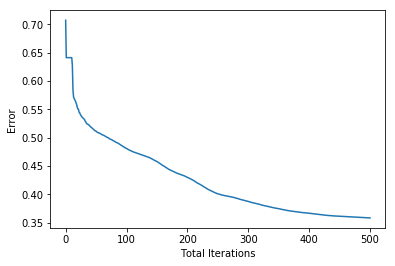

In [59]:
plt.plot(error_trace)
plt.xlabel('Total Iterations')
plt.ylabel('Error')

## Observation:

The error decreases to a minimum in 500 iterations.

In [60]:
results = trainNNs(x_features, y_labels, 0.8, [0, 2, 4, 5, [5, 5], [2, 3], [1, 2, 3], [2, 2], 6, [2]*4], 10, 500, classify=False)

In [61]:
summarize(results)

[[0, 0.6478593835217399, 0.6398658963496278, 0.07599902153015137],
 [2, 0.6196728895416727, 0.6252509150100384, 5.231991767883301],
 [4, 0.5891197611890571, 0.6364395810261538, 5.451992750167847],
 [5, 0.5806788361888479, 0.6334965111761068, 5.667987108230591],
 [[5, 5], 0.5418384955928935, 0.7048371090312414, 9.58798360824585],
 [[2, 3], 0.6081538381745257, 0.654316653191569, 5.63999080657959],
 [[1, 2, 3], 0.6405379685980436, 0.6476405792286986, 6.030189037322998],
 [[2, 2], 0.6139624669466819, 0.6373641121864679, 9.724068403244019],
 [6, 0.5684342996137692, 0.6572291055751383, 11.38441014289856],
 [[2, 2, 2, 2], 0.6138735453803288, 0.646609190622185, 13.138209581375122]]

In [62]:
best_network=bestNetwork(summarize(results))
best_network

[2, 0.6196728895416727, 0.6252509150100384, 5.231991767883301]

Text(0,0.5,'Error')

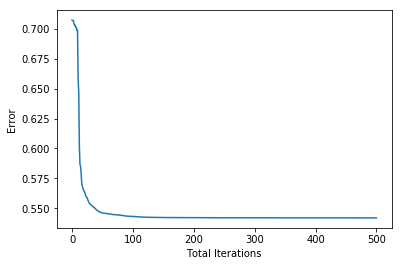

In [63]:
plt.plot(error_trace)
plt.xlabel('Total Iterations')
plt.ylabel('Error')

## Observation:

On increasing the number of hidden layers, the error drastically decreases within 100 iterations and becomes stable.

In [64]:
# Training with the best network
plt.figure(figsize=(8,8))
xTrain,tTrain,xTest,tTest = partition(x_features, y_labels, fractions=[0.8,0.2], classification=False)
print(xTrain.shape,tTrain.shape,xTest.shape,tTest.shape)
nnR = NeuralNetwork(x_features.shape[1], best_network[0], y_labels.shape[1])
nnR.train(xTrain,tTrain,1500)
predictTest = nnR.use(xTest)

(1279, 11) (1279, 1) (320, 11) (320, 1)


<Figure size 576x576 with 0 Axes>

Text(0,0.5,'Predicted wine quality')

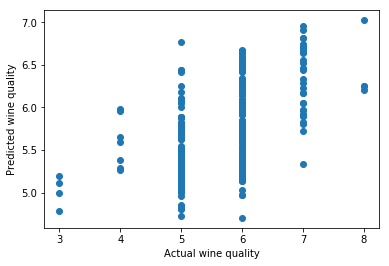

In [65]:
plt.plot(tTest,predictTest, 'o')
plt.xlabel('Actual wine quality')
plt.ylabel('Predicted wine quality')

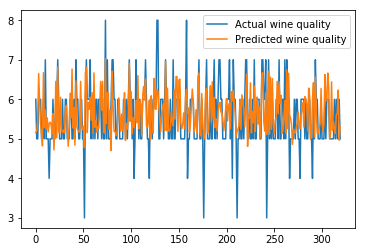

In [66]:
plt.plot(tTest,label='Actual wine quality')
plt.plot(predictTest,label='Predicted wine quality')
plt.legend()

## Observation:

The network is not able to predict values accurately at all times. Thus, we can see that the predicted values plot does not exactly follow the actual values plot.

Interval [(0.6324377779303106, 0.6472940147689449), (0.6190392150592048, 0.631462614960872), (0.62723295709492, 0.6456462049573877), (0.6249331831555687, 0.642059839196645), (0.6945267518849445, 0.7151474661775383), (0.6456644680619058, 0.6629688383212321), (0.6391529826630515, 0.6561281757943456), (0.6293756207174033, 0.6453526036555326), (0.6508706698236668, 0.6635875413266097), (0.6391925280212235, 0.6540258532231465)]
Mean [0.6398658963496278, 0.6252509150100384, 0.6364395810261538, 0.6334965111761068, 0.7048371090312414, 0.654316653191569, 0.6476405792286986, 0.6373641121864679, 0.6572291055751383, 0.646609190622185]


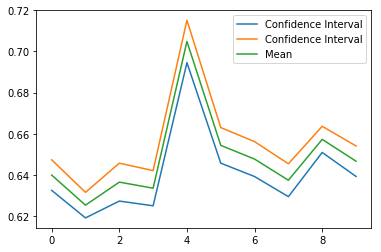

In [68]:
from scipy import stats
import numpy as np
testMean=[]
testStd=[]
confInt=[]
for i in range(len(results)):
    test_mean=np.mean(results[i][2])
    testMean.append(test_mean)
    test_std=np.std(results[i][2])
    testStd.append(test_std)
    conf_int = stats.norm.interval(0.68, loc=test_mean, scale=test_std / np.sqrt(len(results[i][2])))
    confInt.append(conf_int)
print('Interval',confInt)
print('Mean',testMean)
plt.plot(confInt, label='Confidence Interval')
plt.plot(testMean, label='Mean')
plt.legend()

## Classification

I am using QSAR dataset which is a binary classification datatset:
* The [QSAR](http://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation) data for predicting the biochemical activity of a molecule.

In [69]:
qsar_data = np.loadtxt("biodeg.csv", delimiter=";",dtype='str')
x_Data = qsar_data[0:1055, 0:41].astype(np.float)                  #features
y_Data = qsar_data[0:1055, 41]                    #labels
# making col 41 values numerical
y_Data = np.where(y_Data == "RB", 1, 0)
y_qsar=np.reshape(y_Data,(len(y_Data),1))
x_qsar=x_Data
x_qsar.shape,y_qsar.shape

((1055, 41), (1055, 1))

In [70]:
for i in range(2):
    print('{} samples in class {}'.format(np.sum(y_qsar==i), i))

699 samples in class 0
356 samples in class 1


In [71]:
results = trainNNs(x_qsar, y_qsar, 0.8, [0, 5, [10, 12], [5,5,5]], 5, 500, classify=True)

In [72]:
summarize(results)

[[0, 0.11350710900473933, 0.13364928909952606, 2.4413444995880127],
 [5, 0.01018957345971564, 0.15545023696682464, 6.131326675415039],
 [[10, 12], 0.0, 0.18862559241706162, 7.922283172607422],
 [[5, 5, 5], 0.006872037914691943, 0.18578199052132702, 10.720668077468872]]

In [73]:
bestNetwork(summarize(results))

[0, 0.11350710900473933, 0.13364928909952606, 2.4413444995880127]

Text(0,0.5,'Error')

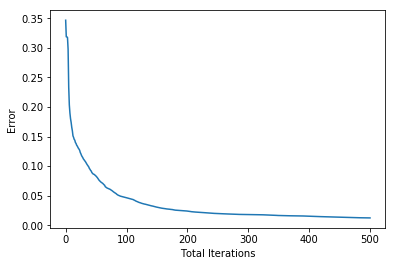

In [74]:
plt.plot(error_trace)
plt.xlabel('Total Iterations')
plt.ylabel('Error')

**Within 500 iterations, the network achieves minimum error**

In [75]:
results = trainNNs(x_qsar, y_qsar, 0.8, [0, 5, [5, 5], 2, [4, 3, 7], [3, 10, 12], 6, [9, 4], [10, 10, 10, 5], [2]*5], 10, 200, classify=True)

In [76]:
summarize(results)

[[0, 0.11101895734597156, 0.13270142180094785, 1.9933791160583496],
 [5, 0.015521327014218012, 0.14549763033175356, 4.92720365524292],
 [[5, 5], 0.01504739336492891, 0.14644549763033174, 6.539151906967163],
 [2, 0.06919431279620854, 0.14502369668246445, 4.017928838729858],
 [[4, 3, 7], 0.02618483412322275, 0.15071090047393362, 7.776026487350464],
 [[3, 10, 12], 0.03898104265402843, 0.14028436018957344, 7.5332190990448],
 [6, 0.008767772511848342, 0.14928909952606634, 5.038617372512817],
 [[9, 4], 0.0018957345971563982, 0.15497630331753554, 8.228344678878784],
 [[10, 10, 10, 5],
  0.007345971563981042,
  0.15118483412322276,
  10.520211935043335],
 [[2, 2, 2, 2, 2],
  0.06812796208530805,
  0.16113744075829384,
  8.326980590820312]]

In [77]:
best_network=bestNetwork(summarize(results))
best_network

[0, 0.11101895734597156, 0.13270142180094785, 1.9933791160583496]

Text(0,0.5,'Error')

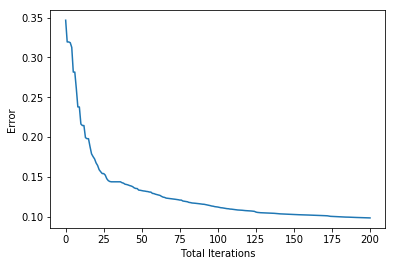

In [78]:
plt.plot(error_trace)
plt.xlabel('Total Iterations')
plt.ylabel('Error')

**Now, training the network on the best hidden structure**

In [79]:
xTrain,tTrain,xTest,tTest = partition(x_qsar, y_qsar, fractions=[0.8,0.2], classification=True)
nnC = NeuralNetworkClassifier(x_qsar.shape[1], best_network[0], len(np.unique(y_qsar)))
nnC.train(xTrain,tTrain,1500)
Ptrain,Prtrain,_ = nnC.use(xTrain,allOutputs=True)
Ptest,Prtest,_ = nnC.use(xTest,allOutputs=True)
cm = ml.confusionMatrix(tTest,Ptest,np.unique(tTest))

       0    1
    ------------
 0 | 87.9 12.1   (140 / 140)
 1 | 18.3 81.7   (71 / 71)


**We can say that the network classified class 0: 90% accurately and class 1: 82% accurately**